# Título Placeholder

## Preparar ambiente

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Dados do Sistema e Constantes

In [3]:
# Tempo em minutos, de acordo com seção 3.3.2. (FABRICAÇÃO DO PRODUTO)
t_total = 60
# Massa de água e mosto, em kg, baseado na seção 3.3.2. (FABRICAÇÃO DO PRODUTO)
massa_agua = 25.5
massa_malte = 8.5
massa_mosto = massa_agua + massa_malte
# Aproximado da capacidade térmica da água em KJ/(kg·K), baseado em https://www.fq.pt/tabelas/capacidades-termicas-massicas
c = 4.1855
# Constantes da equação de Antoine para a água de acordo com http://paginapessoal.utfpr.edu.br/lisandra/fisico-quimica-alimentos/anexos/C8-6_-_Pv_Antoine.pdf/view
ant_A = 18.3036
ant_B = 3816.44
ant_C = -46.13

# Limites baseados nas restrições para a aplicação da Lei de Atoine de acordo com http://paginapessoal.utfpr.edu.br/lisandra/fisico-quimica-alimentos/anexos/C8-6_-_Pv_Antoine.pdf/view
# Em Kelvin
# TODO: reavaliar esses limites, os dados relacinados à equação de Arrhenius forão testados entre 363.15 e 403.15 k
limites_temperatura = [(284, 441)]
T_min, T_max = limites_temperatura[0]
# 293.15 k é equivalente a 20 C°, eu achei que seria um valor inicial adequado
T0 = 293.15

# Funções Físico-Químicas

In [4]:
def isomerizacao(T):
    # "Velocidade da isomerização"
    # A constante de Arrhenius para esse caso seria k = (7.9 × 10^11) e^(-11858/T), on T é a Temperatura Absoluta, baseado em https://doi.org/10.1021/jf0481296
    return 7.9e11 * np.exp(-11858 / T)

def pressao_vapor(T):
    T_celsius = T - 273.15
    return 10 ** (ant_A - ant_B / (ant_C + T_celsius))

# Função Objetivo

In [5]:
def energia_total_entrada(q_entrada):
    return np.sum(q_entrada)

def iso_total():
    return 0.0

def massa_evaporada():
    return 0.0

def densidade():
    return 0.0

In [6]:

def func_objetivo(q_entrada):

    # TODO
    
    # Pesos, de acordo com o objetivo (Minimizar energia e evaporação, maximizar isomerização e regular a densidade), seção 3.3.3.(CONTROLE ÓTIMO MULTIOBJETIVO UTILIZANDO ALGORITMO GENÉTICO)
    w1, w2, w3, w4 = 1, -1, 1, -1

    return (
        w1 * energia_total_entrada(q_entrada) +
        w2 * iso_total() +
        w3 * massa_evaporada() +
        w4 * densidade()
    )

# Otimização

In [13]:
# vetor de tempo
t_array = np.linspace(0, t_total, 100)
N = t_array.shape[0]

# chute inicial para a otimização
q_entrada_inicial = np.array([1.0] * N)  #

# bounds para q_entrada
bounds = [(10.0, 100.0)] * N  

In [14]:
res = minimize(func_objetivo, q_entrada_inicial, bounds=bounds)
print("Resultado da otimização:")
print("Calor aplicado:", res.x[0])
print("Valor da função objetivo:", res.fun)

Resultado da otimização:
Calor aplicado: 10.0
Valor da função objetivo: 1000.0


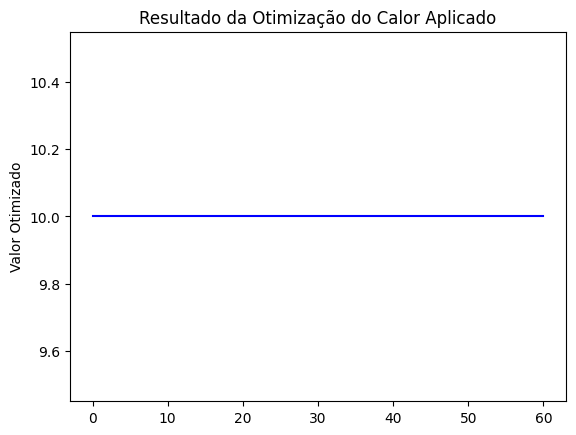

In [15]:
plt.plot(t_array, res.x, color='blue')
plt.ylabel('Valor Otimizado')
plt.title('Resultado da Otimização do Calor Aplicado')
plt.show()